
> Develop a model that can predict whether a employee seek insurance or not.





In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-in-tech-survey/survey.csv



* Companies can use this model to know better about employee mental health issues and provide benefits for the needful employees, thus making efficient use of companies resources. This model can help in cutting off extra cost of providing mental health benefits for people who don't seek and use that money for other benefits of that employee. This will eventually increase employee satisfaction leading employee retention overall.


# Performance Metric
> F1 score as the performance metric for this problem.

Focus is more on getting positive class right. Positive class-A true positive is an outcome where the model correctly predicts the positive class.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

In [4]:
df.shape

(1259, 27)

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

* There are 26 columns where age is numerical, else all are categorical.
Time stamp is a useless column.

## Data Preparation


In [7]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()

In [8]:
round((df.isna().sum()/df.shape[0])*100,2)

timestamp                     0.00
age                           0.00
gender                        0.00
country                       0.00
state                        40.91
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     86.97
dtype: float64

* Comments column has almost 87% null values.We can drop this column.


In [9]:
df['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

* More than 75% of people are from US. It is not that more people from US are suffering from mental health problems, the survey is taken up mostly by the us people. There are very few people who took part in survey from other countries, so it is often misleading to conclude people from certain region suffer more. So we will drop this column


In [10]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

* All the states are from US, so we can drop this column too.

In [11]:
df = df.drop(['country','state','timestamp','comments'], axis = 1)

In [12]:
round(df.describe(include='all'),2)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Values in age section are not correct.
Gender - We need to clean gender column as it is having too many different categories.
Almost all columns are categorical with 2 & 3 classes.


In [13]:
df['gender'].value_counts().reset_index()

,index,gender
0,Male,615
1,male,206
2,Female,121
3,M,116
4,female,62
5,F,38
6,m,34
7,f,15
8,Make,4
9,Male,3


In [14]:
df['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [15]:
df['gender'].value_counts()

Male      991
Female    247
Other      21
Name: gender, dtype: int64

 Male are dominant in number than female.

In [16]:
# Let us treat age
df.loc[df.age<12,'age']=15
df.loc[df.age>75,'age']=75

In [17]:
df[df['age'] > 80].head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


<AxesSubplot:>

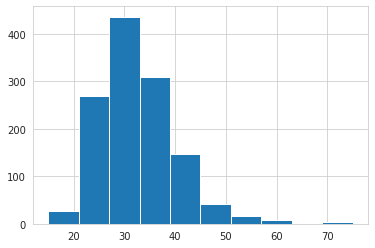

In [18]:
df['age'].hist()

<AxesSubplot:>

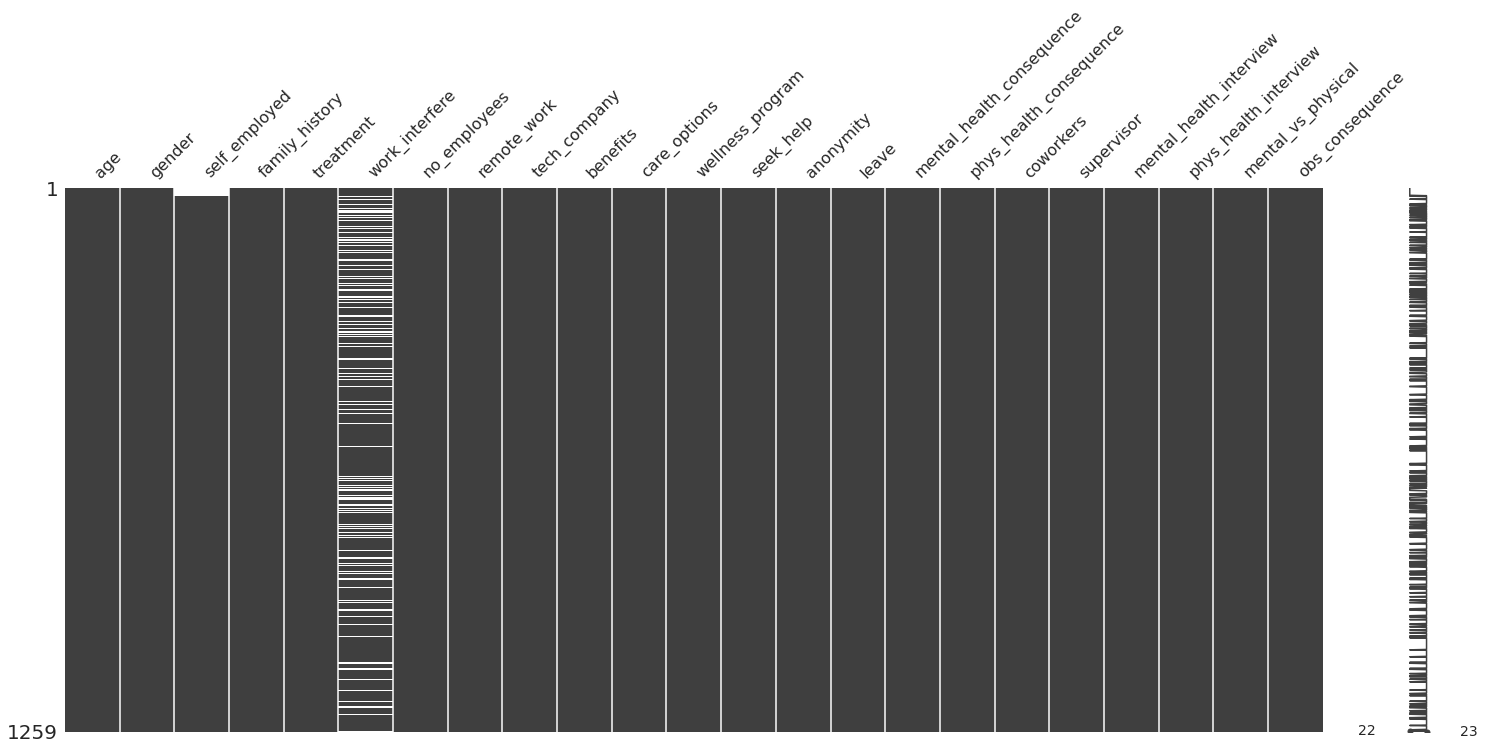

In [19]:
#to check null values
msno.matrix(df)

In [20]:
# We should not perform eda on test data as it will cloud your decision of model selections and hyperparameters.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.15,stratify=df['treatment'],random_state=42 )

In [21]:
print(f'Train_data Dimensions : {train_data.shape}\n Test data dimension : {test_data.shape}')

Train_data Dimensions : (1070, 23)
 Test data dimension : (189, 23)


In [22]:
health = train_data.copy()

In [23]:
health.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Have you sought treatment for a mental health condition?

In [24]:
plt.figure(figsize=(8,8))
px.histogram(health, x = 'treatment',color='treatment')

<Figure size 576x576 with 0 Axes>

> General insight
* Nearly 50% of people are seeking help.This is a very large portion. Studies show that **Mental illness is a major risk factor for suicide** , So we must ensure that every person seeking help must be treated
> Insight for model building
* This is our target variable


### What is your age?

In [25]:
px.histogram(health, x = 'age' , color = 'treatment' )

> General insight
* Children of age below 12 also took part of survey. Assume these are false entries and we will remove these in the preprocessing step

### Are you self-employed?

In [26]:
px.histogram(health, x = 'self_employed',color='treatment',barmode='group')

> General insight
* Around 10% of people are self employed. Even though there is vast difference in this, people seeking treatment are of same percentage in both categories.
* Thus whether self employed or not , does not really matter on whether the person seeks treatment or not.

### If you have a mental health condition, do you feel that it interferes with your work?

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

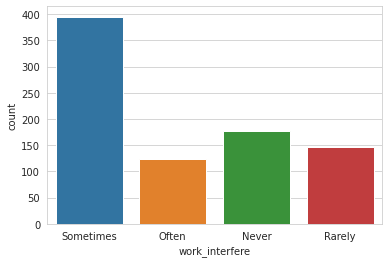

In [27]:
sns.countplot(data = health , x = 'work_interfere')

In [28]:
health['work_interfere'].value_counts(normalize = True)

Sometimes    0.468009
Never        0.210900
Rarely       0.174171
Often        0.146919
Name: work_interfere, dtype: float64

In [29]:
px.histogram(health, x = 'work_interfere',color='treatment',barmode='group')


> General insight
* About 78% of respondents have experienced interference at work with a ratio of rarely, sometimes, and frequently.
* Mental health conditions sometimes become an interfere while working about 45%. The plots prove that almost 80% want to get treatment. But it's surprising to know even mental health never has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered by the requirements of the job do not match the capabilities, resources or needs of the worker
* **If you are running a tech organization , you should consider providing resources for employees seeking treatment and it will help in boosting employee experience and will definitely increase their productivity.**

###  Do you have a family history of mental illness?


In [30]:
px.histogram(health, x = 'family_history',color='treatment',barmode='group')

> General insight
* People who have family history of mental illness are more likely to seek treatment. Around 35% of people without family history are also seeking help
> Insight for model building
* People with family history are more likely to seek treatment than without family history
* Family history will be a important feature

### Do you work remotely (outside of an office) at least 50% of the time?

<AxesSubplot:xlabel='remote_work', ylabel='count'>

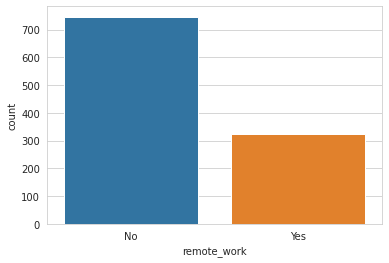

In [31]:
sns.countplot(data = health , x = 'remote_work')

In [32]:
px.histogram(health, x = 'remote_work',color='treatment',barmode='group')

> General insight
* Doesn't matter remote work or not, almost 50% of people in both categories seek treatment.
* People in remote work are sligtly more in number who seek treatment.
* **It might be due to lack of social interaction in remote mode.**


### Does your employer provide mental health benefits?

<AxesSubplot:xlabel='benefits', ylabel='count'>

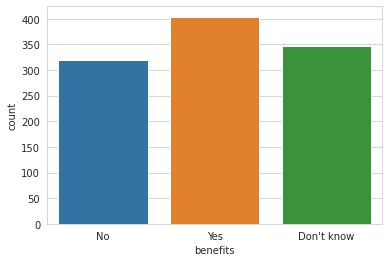

In [33]:
sns.countplot(data = health , x = 'benefits')

In [34]:
health['benefits'].value_counts(normalize = True)

Yes           0.377570
Don't know    0.324299
No            0.298131
Name: benefits, dtype: float64

In [35]:
px.histogram(health, x = 'benefits',color='treatment',barmode='group')

> General insight
* We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
* Coming to the second graph,we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. **So we can see the employer resources are utilized to a larger extent.**
* Even if you think about the cost , you should definitely go for it because it is efficiently utilized by the employees. 
* Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

### Do you know the options for mental health care your employer provides?

<AxesSubplot:xlabel='care_options', ylabel='count'>

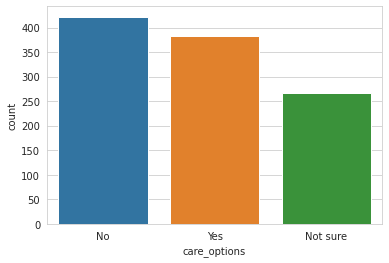

In [36]:
sns.countplot(data = health , x = 'care_options')

In [37]:
health['care_options'].value_counts(normalize=True)

No          0.394393
Yes         0.357009
Not sure    0.248598
Name: care_options, dtype: float64

In [38]:
px.histogram(health, x = 'care_options',color='treatment',barmode='group')

> General Insights
* 40% of employees are not provided any care options and 25% are not sure whether care options exist in company.
* We can see 60% of employees whos organization dont have care options are seeking treatment. These organizations needs to address this issue. People who have care options are actually seeking treatment, this can validate our claim to have care options.

### How many employees does your company or organization have?

<AxesSubplot:xlabel='no_employees', ylabel='count'>

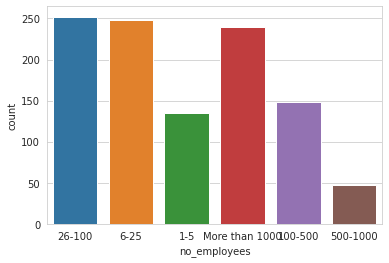

In [39]:
sns.countplot(data = health , x = 'no_employees')

> Does size of organization determines whether it will benefit or not?

In [40]:
px.histogram(health, x = 'no_employees',color='benefits',barmode='group')

* Interesting find, Large companies (having more employees) provide benefits rather than small sized companies.

In [41]:
px.histogram(health, x = 'no_employees',color='treatment',barmode='group')

> General Insight
* More than 50% of people in every organization whether it is small or large doesn't matter, they are seeking help.
* This problem is more relevant in small sized orgs, may be due to fewer health benefits provided.

### Has your employer ever discussed mental health as part of an employee wellness program?

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

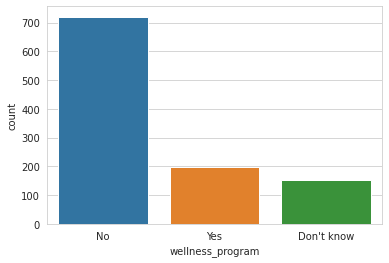

In [42]:
sns.countplot(data = health , x = 'wellness_program')


In [43]:
px.histogram(health, x = 'wellness_program',color='treatment',barmode='group')

> General insight
* Most of the respondants employers haven't discussed mental health as a employee wellness program.
* Around 50% People who don't know about the program are seeking help. **This means organizations should explain the mental health benefits provided by the company**
* **Companies should include mental health in the employee wellness program.This shouldn't be overlooked**

### Does your employer provide resources to learn more about mental health issues and how to seek help?

<AxesSubplot:xlabel='seek_help', ylabel='count'>

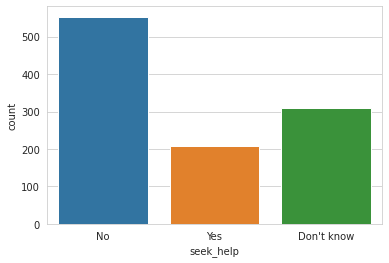

In [44]:
sns.countplot(data = health , x = 'seek_help')

In [45]:
px.histogram(health, x = 'seek_help',color='treatment',barmode='group')

> General insight
* Most of the companies either don't provide any resources or it may be that **They dont provide information about the existing resources**

### Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

<AxesSubplot:xlabel='anonymity', ylabel='count'>

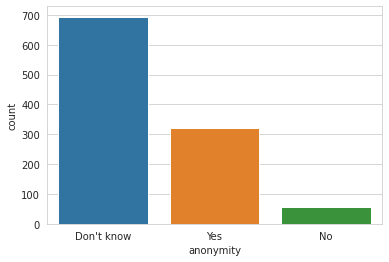

In [46]:
sns.countplot(data = health , x = 'anonymity')

In [47]:
px.histogram(health, x = 'anonymity',color='treatment',barmode='group')

> General Insight
* Most people don't know whether their anonymity is protected if they decided to take seek treatment. 
* **Companies should create a safe environment for people to feel safe to share their problems.**
* **We can establish the fact that people who think their anonymity is protected are more willing to seek treatment.**

### How easy is it for you to take medical leave for a mental health condition?

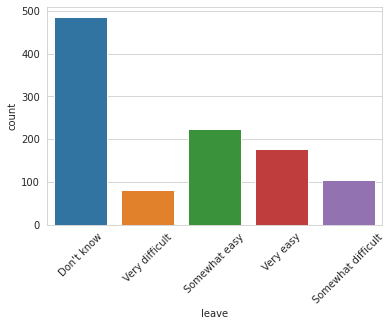

In [48]:
sns.countplot(data = health , x = 'leave')
plt.xticks(rotation=45)
plt.show()

In [49]:
px.histogram(health, x = 'leave',color='treatment',barmode='group')

> General Insight
* Even though people who think it is difficult to get leave regarding mental health concerns are less but the proportion of people who seek help in this category is higher than all others.

### Do you think that discussing a mental health issue with your employer would have negative consequences?

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

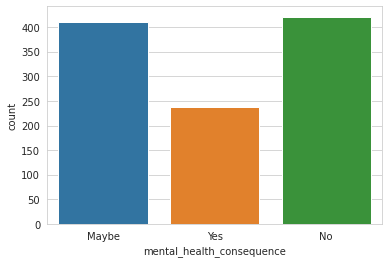

In [50]:
sns.countplot(data = health , x = 'mental_health_consequence' )

In [51]:
px.histogram(health, x = 'mental_health_consequence',color='treatment',barmode='group')

> General Insight
* Around 70% of people either thinks discussing mental health problem will have negative consequence or not sure whether it will have a impact.
* And out of people who think it will have a negative impact, most people seek treatment.

### Would you be willing to discuss a mental health issue with your coworkers?

<AxesSubplot:xlabel='coworkers', ylabel='count'>

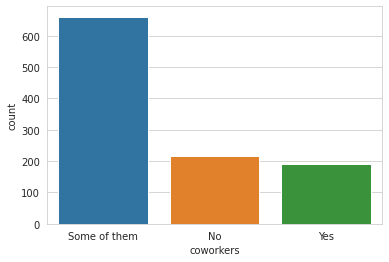

In [52]:
sns.countplot(data = health , x = 'coworkers' )

In [53]:
px.histogram(health, x = 'coworkers',color='treatment',barmode='group')

> General Insight
* It is good sign that most people have atleast some people(coworkers) to talk to about the mental health issues.

### Do you feel that your employer takes mental health as seriously as physical health?

<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

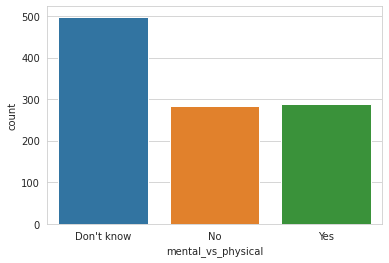

In [54]:
sns.countplot(data = health , x = 'mental_vs_physical' )

In [55]:
px.histogram(health, x = 'mental_vs_physical',color='treatment',barmode='group')

> General Insight
* Employees who think their company doesn't take mental health seriously or who are not sure, are more inclined to seek treatment than the other two categories.

### Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

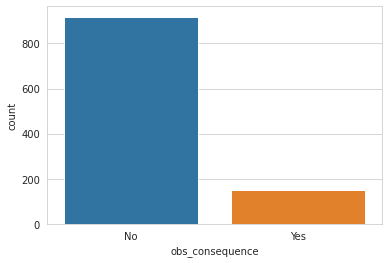

In [56]:
sns.countplot(data = health , x = 'obs_consequence')

In [57]:
px.histogram(health, x = 'obs_consequence',color='treatment',barmode='group')

> General Insight
* Almost 85% of people never heard of or observed co-workers having negative consequences for having mental health issues.
* Out of remaining people,who observed negative consequences for co-workers, 10% of them are seeking help.

----
## We are done with our EDA (Exploratory Data Analysis), We have got some valuable insights for the companies on grabing the best interests of employees.This will be useful for Human resource teams to decide on to introduce new wellness programs,resources etc for employees.
---


# Data Pre-processing

> First, we need to treat missing values for the columns work_interfere and self_employed.

In [58]:
#Self employed column contains as low as 2% null values , so it is okay to replace it with mode.
se_mode = train_data['self_employed'].mode().values[0] 
train_data['self_employed'].fillna(se_mode,inplace=True)
# Work_interfere contains almost 20% null values which is significant as we have less data.Let us once see the null values to find any pattern
train_data[train_data['work_interfere'].isna()]['treatment'].value_counts()


No     223
Yes      3
Name: treatment, dtype: int64

* Intersting, almost 99% of the people who didn't answer the question 'Whether mental health interferes with work' don't seek help'.
* If we think null values as a category , it is more similar to category **NEVER** of all categories of column work_interfere. So we will use this to replace null values.

In [59]:
train_data['work_interfere'].fillna('Never',inplace = True)

<AxesSubplot:>

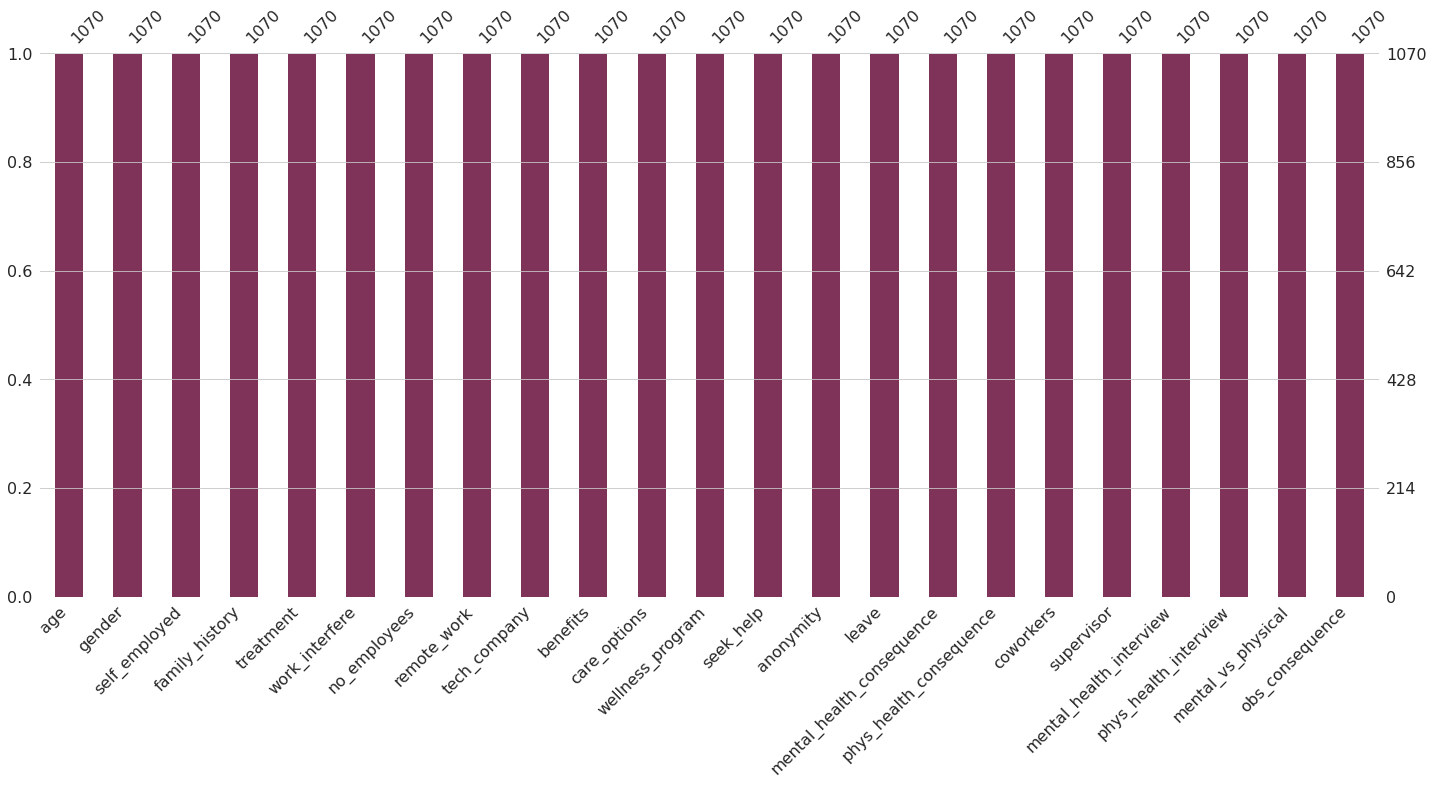

In [60]:
msno.bar(train_data,color = (0.5,0.2,0.35))

* No missing values, we are clear to go for the next step.

In [61]:
# Let us divide training set into independent and dependent variables
X_train = train_data.drop('treatment',axis=1)
y_train = train_data['treatment'].copy()

> Almost except age, all the columns are categorical. We will use label encoding because most of them are binary columns and for columns having more than 2 categories, we will use ordinal encoder to capture the relationship between categories.

In [62]:
train_data.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

#### Encoding conserving the ordinal information.

In [63]:
gender_cols = ['Female','Male','Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
work_interfere_cols = ['Never','Rarely','Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_col = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']

columns_for_encoder = [gender_cols,self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                            tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                            mental_health_consequence_cols,phys_health_consequence_cols,coworkers_col,supervisor_cols,mental_health_interview_cols,
                            phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols]

In [64]:
features = list(X_train.columns)

In [65]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
X_train[features[1:]] = ord_encoder.fit_transform(X_train.iloc[:,1:])

In [66]:
X_train.head()

,age,gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,22,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
88,29,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
86,39,1.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1210,24,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
505,46,1.0,0.0,0.0,2.0,5.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


In [67]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train[features] = std_scaler.fit_transform(X_train)

In [68]:
X_train

,age,gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,-1.363472,0.419109,-0.362047,-0.803837,-1.135675,-0.243796,-0.659027,0.480937,-1.319345,-1.111531,-0.650242,-0.869401,-0.461953,0.267568,0.223297,1.212902,0.040848,1.062155,1.546143,0.357235,-0.963586,-0.406912
88,-0.409844,-1.904448,-0.362047,-0.803837,0.720967,-0.243796,-0.659027,0.480937,1.125156,1.197863,-0.650242,-0.869401,-0.461953,0.267568,0.223297,-0.569797,0.040848,-0.124177,-0.461591,0.357235,0.233902,2.457534
86,0.952483,0.419109,2.762070,-0.803837,1.649288,-0.831323,-0.659027,0.480937,-1.319345,-1.111531,-0.650242,-0.869401,-0.461953,2.108713,0.223297,-0.569797,0.040848,-1.310508,-0.461591,0.357235,0.233902,2.457534
1210,-1.091007,0.419109,-0.362047,1.244033,-1.135675,-1.418850,-0.659027,0.480937,-1.319345,-1.111531,-0.650242,-0.869401,-0.461953,0.267568,0.223297,1.212902,-1.577948,-1.310508,-0.461591,-1.058475,-0.963586,-0.406912
505,1.906111,0.419109,-0.362047,-0.803837,0.720967,1.518785,-0.659027,0.480937,1.125156,1.197863,1.893665,1.700376,-0.461953,0.267568,0.223297,-0.569797,0.040848,-1.310508,-0.461591,-1.058475,1.431390,-0.406912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,-1.227240,0.419109,-0.362047,1.244033,0.720967,-0.243796,-0.659027,0.480937,1.125156,0.043166,1.893665,1.700376,1.396280,-0.653004,-1.082318,-0.569797,-1.577948,-1.310508,-0.461591,0.357235,-0.963586,-0.406912
598,1.497413,0.419109,-0.362047,-0.803837,-1.135675,0.931258,1.517389,0.480937,-0.097095,0.043166,0.621712,0.415487,-0.461953,0.267568,-1.082318,-0.569797,1.659645,1.062155,-0.461591,-1.058475,1.431390,-0.406912
363,-0.001146,0.419109,-0.362047,1.244033,-0.207354,1.518785,-0.659027,-2.079275,1.125156,1.197863,1.893665,1.700376,1.396280,0.267568,-1.082318,-0.569797,0.040848,1.062155,-0.461591,1.772946,1.431390,-0.406912
690,-1.227240,0.419109,-0.362047,-0.803837,0.720967,-0.831323,-0.659027,0.480937,1.125156,-1.111531,-0.650242,-0.869401,-0.461953,-0.653004,0.223297,1.212902,0.040848,-0.124177,-0.461591,-1.058475,-0.963586,-0.406912


In [69]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)


* Data preprocessing part is completed.Now let us head to model building. We will try various models and then shortlist the promissing models.


## Model building and evaluation

----


In [70]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [71]:
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)
    
    # returning the scores
    score = pd.DataFrame({'Name' : name ,'F1_score_trainset' : [f1_train], 'F1_score_validationset' : [f1_val.mean()]})
    return score

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
train_evaluate(log_reg,X_train,y_train,'Logistic Regression')

,Name,F1_score_trainset,F1_score_validationset
0,Logistic Regression,0.826521,0.817808


### Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4,random_state=42)
train_evaluate(dt_clf,X_train,y_train,'DecisionTreeClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,DecisionTreeClassifier,0.851698,0.851769


### SVM


In [74]:
from sklearn.svm import SVC
svc_clf = SVC()
train_evaluate(svc_clf,X_train,y_train,'Support Vector Classifier')

,Name,F1_score_trainset,F1_score_validationset
0,Support Vector Classifier,0.885159,0.834448


> Let us try bagging models

### Random Forest 

In [75]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
train_evaluate(rnd_clf,X_train,y_train,'RandomForestClassifier')

,Name,F1_score_trainset,F1_score_validationset
0,RandomForestClassifier,1.0,0.842216


> Boosting Models

### AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier
dt_clf_ada = DecisionTreeClassifier()
Ada_clf = AdaBoostClassifier(base_estimator=dt_clf_ada,random_state=42)

train_evaluate(Ada_clf,X_train,y_train,"ADA BOOST CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,ADA BOOST CLASSIFIER,1.0,0.759314


### GradientBoost

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier(random_state=42,subsample=0.8)

train_evaluate(gdb_clf,X_train,y_train,"GradientBoosting CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,GradientBoosting CLASSIFIER,0.897596,0.850009


### XGBoost

In [78]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(verbosity=0)

In [79]:
train_evaluate(xgb_clf,X_train,y_train,"XG Boost CLASSIFIER")

,Name,F1_score_trainset,F1_score_validationset
0,XG Boost CLASSIFIER,1.0,0.828707


### Shortlisting the promising Models
* SVM
* Random Forest
* Gradient Boosting
* XGBoost

> Let us tune these models hyperparameters

#### Fine Tuning Support Vector classifier

In [80]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
        'kernel': ['linear', 'rbf','polynomial'],
        'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }
svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf , param_grid = param_distribs,
                              cv=5,scoring='f1',
                              verbose=1)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='f1', verbose=1)

In [81]:
grid_cv.best_estimator_

SVC(C=0.5, gamma=0.01)

In [82]:
train_evaluate(grid_cv.best_estimator_,X_train,y_train,"SVC Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,SVC Tuned,0.848908,0.842824


#### Fine Tuning Random Forest classifier

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [84]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=6, n_estimators=10,
                       random_state=42)

In [85]:
train_evaluate(grid_search.best_estimator_,X_train,y_train,"RandomForest Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,RandomForest Tuned,0.851698,0.850809


#### Finetuning GradientBoost

In [86]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],
    'max_features':[2,4,6,8,10],
    'max_depth' : [1,2,3,4],
    'subsample': [0.25,0.5,0.75]}
]

gdb_clf2 = GradientBoostingClassifier(random_state=42)
grid_search2 = GridSearchCV(gdb_clf2, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'subsample': [0.25, 0.5, 0.75]}],
             return_train_score=True, scoring='f1')

In [87]:
grid_search2.best_estimator_

GradientBoostingClassifier(max_features=6, n_estimators=10, random_state=42,
                           subsample=0.5)

In [88]:
train_evaluate(grid_search2.best_estimator_,X_train,y_train,"GradientBoosting Tuned")

,Name,F1_score_trainset,F1_score_validationset
0,GradientBoosting Tuned,0.856664,0.852743


In [89]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],
    'eta' : [0.01,0.025, 0.05, 0.1],
    'max_features':[2,4,6,8],
    'max_depth' : [1,2,3,4],
    'subsample': [0.5,0.75],
    'booster':['gblinear','gbtree']}
]

xgb_clf = XGBClassifier(verbosity = 0)
grid_search3 = GridSearchCV(xgb_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [90]:
grid_search3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.05,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_features=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)

In [91]:
train_evaluate(grid_search3.best_estimator_,X_train,y_train,"XGBoost Finetuned")

,Name,F1_score_trainset,F1_score_validationset
0,XGBoost Finetuned,0.860051,0.856225


In [92]:
XGBoost_final = grid_search3.best_estimator_

In [93]:
scores = pd.DataFrame({'Train_score' : [0.8489,0.8517,0.8566,0.8601],'Val_score' : [0.8428,0.8508,0.8527,0.8563]} 
                        ,index=['SVM','RandomForest','GDBoost','XGBoost'])
scores

,Train_score,Val_score
SVM,0.8489,0.8428
RandomForest,0.8517,0.8508
GDBoost,0.8566,0.8527
XGBoost,0.8601,0.8563


#### After finetuning, XGboost is generalizing well on our dataset. So XGBoost will be our selected model.


> Let us verify our model on test data

* Repeating the preprocessing steps for the test data

In [94]:
X_test = test_data.drop('treatment',axis=1)
y_test = test_data['treatment'].copy()

In [95]:
X_test['self_employed'].fillna(se_mode,inplace=True)
X_test['work_interfere'].fillna('Never',inplace = True)

In [96]:
from sklearn.preprocessing import OrdinalEncoder
# We should only transform using the learned encoder from the training set
X_test[features[1:]] = ord_encoder.transform(X_test.iloc[:,1:])

In [97]:
X_test[features] = std_scaler.transform(X_test)

In [98]:
# Encoding the target column
y_test = lb_encoder.transform(y_test)

In [99]:
# Evaluating the model on test set with our finalized model
y_test_pred = XGBoost_final.predict(X_test)
print(f'F1_score on Test Set : {f1_score(y_test,y_test_pred)}')

F1_score on Test Set : 0.8269230769230769


### So finally,First part of our problem is done.
* We have a developed a model which can predict whether a employee seeks mental health treatment or not.

# Identify the key features that lead to mental health problems in tech space

In [100]:
data = {'feature_names':features,'feature_importance': XGBoost_final.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

Text(0.5, 1.0, 'Key Features')

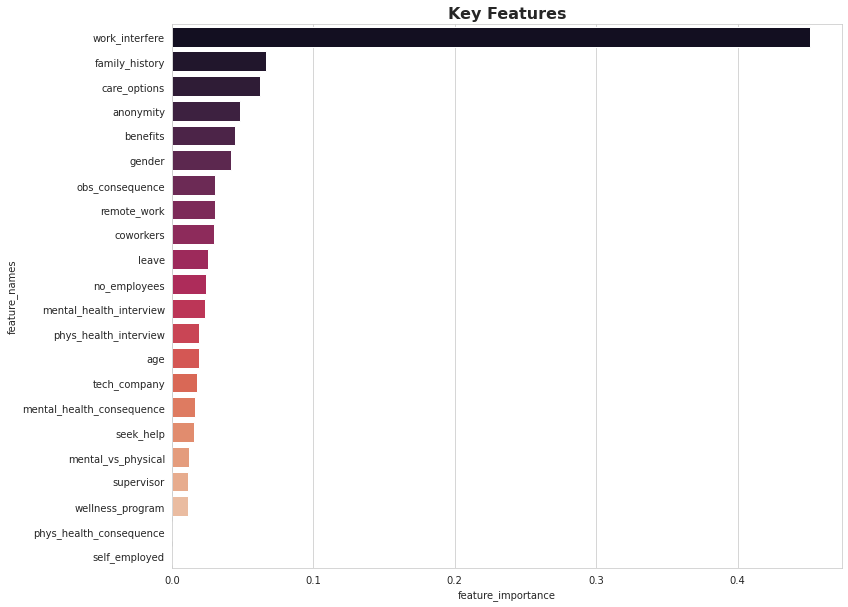

In [101]:
# I have found this method from stackoverflow for plotting feature importance easily
plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Key Features", fontsize=16, fontweight="bold")

In [102]:
top_feature = featureimp_df.sort_values('feature_importance', ascending=False).iloc[0]['feature_names']

# print the top feature
print("The top most attribute is:", top_feature)

The top most attribute is: work_interfere


In [103]:
# Assuming your data is stored in a pandas DataFrame called "data_df"
# Filter the DataFrame to only include rows where work_interfere is "sometimes" or "often"
filtered_data_df = df[df['work_interfere'].isin(['Sometimes', 'Often'])]

# Print out the details of the filtered data
print(filtered_data_df)


      age  gender self_employed family_history treatment work_interfere  \
0      37  Female           NaN             No       Yes          Often   
3      31    Male           NaN            Yes       Yes          Often   
5      33    Male           NaN            Yes        No      Sometimes   
6      35  Female           NaN            Yes       Yes      Sometimes   
8      42  Female           NaN            Yes       Yes      Sometimes   
...   ...     ...           ...            ...       ...            ...   
1251   36    Male            No            Yes       Yes          Often   
1252   29    Male            No            Yes       Yes      Sometimes   
1255   32    Male            No            Yes       Yes          Often   
1256   34    Male            No            Yes       Yes      Sometimes   
1258   25    Male            No            Yes       Yes      Sometimes   

        no_employees remote_work tech_company benefits care_options  \
0               6-25        

In [104]:
# Assuming your data is stored in a pandas DataFrame called "df"
# Filter the DataFrame to only include rows where work_interfere is "sometimes" or "often"
filtered_data_df = df[df['work_interfere'].isin(['Sometimes', 'Often'])]

# Add a new column "mental_health_insurance" with values of 0 or 1 based on "work_interfere"
filtered_data_df['mental_health_insurance'] = (filtered_data_df['work_interfere'].isin(['Sometimes', 'Often'])).astype(int)

# Select the "gender", "age", and "mental_health_insurance" columns
output = filtered_data_df[[ 'gender', 'age', 'mental_health_insurance']]

# Print the output
print(output.to_string(index=False))


gender  age  mental_health_insurance
Female   37                        1
  Male   31                        1
  Male   33                        1
Female   35                        1
Female   42                        1
  Male   31                        1
Female   42                        1
  Male   23                        1
  Male   32                        1
  Male   46                        1
  Male   29                        1
  Male   46                        1
  Male   35                        1
  Male   34                        1
  Male   37                        1
  Male   30                        1
  Male   42                        1
Female   40                        1
  Male   24                        1
  Male   27                        1
  Male   18                        1
  Male   30                        1
Female   38                        1
  Male   26                        1
  Male   22                        1
  Male   24                        1
 

In [105]:
# Count the number of males and females in the "gender" column
male_count = (output['gender'] == 'Male').sum()
female_count = (output['gender'] == 'Female').sum()
other_count = (output['gender'] == 'Other').sum()

# Print the counts
total_count = len(filtered_data_df)

# Print the total number of people who need mental health aid
print(f"The total number of people who need mental health aid is {total_count}.")
print(f"Number of males: {male_count}")
print(f"Number of females: {female_count}")
print(f"Number of others: {other_count}")



The total number of people who need mental health aid is 609.
Number of males: 451
Number of females: 142
Number of others: 16


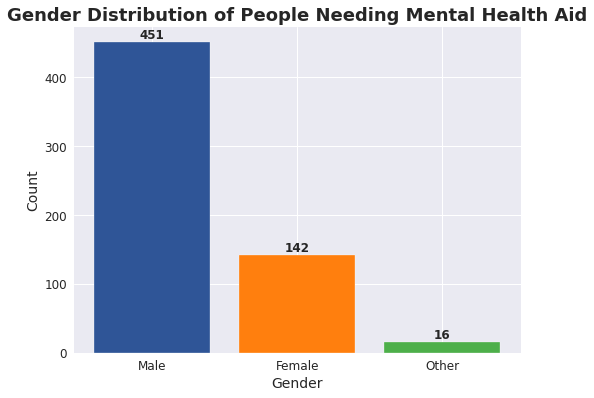

In [106]:
import matplotlib.pyplot as plt

# Calculate the gender counts
male_count = (output['gender'] == 'Male').sum()
female_count = (output['gender'] == 'Female').sum()
other_count = (output['gender'] == 'Other').sum()

# Calculate the total count
total_count = len(output)

# Create a list of the gender counts
gender_counts = [male_count, female_count, other_count]

# Create a list of the gender labels
gender_labels = ['Male', 'Female', 'Other']

# Set the style of the plot
plt.style.use('seaborn')

# Create a figure with a size of 8x6 inches
fig, ax = plt.subplots(figsize=(8,6))

# Create a bar chart
ax.bar(gender_labels, gender_counts, color=['#2f5597', '#ff7f0e', '#4daf4a'])

# Set the title, x-axis and y-axis labels
ax.set_title('Gender Distribution of People Needing Mental Health Aid', fontsize=18, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the font size of the tick labels on both axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Add the count values to the bars
for i, v in enumerate(gender_counts):
    ax.text(i, v+5, str(v), ha='center', fontweight='bold', fontsize=12)

# Save the plot to a file and show it
plt.savefig('gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


* Work interference has the largest contribution. Whether the employee's mental health issues interfering with the work is the thing that the company should ask for its employees.
* Family history and care options(programs and benfits) provided by company is also influential in employees who want to get treatment.
* For all the remaining features,there has been a little contribution.
* noticing/knowing some of these features beforehand can even help support an individual who may be experiencing a mental health issues and and connect them with the appropriate employee resources.